In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms
from pathlib import Path

In [11]:
# Define paths
base_path = Path("satlite_gap/satlite_gap")
reference_sources = [
    base_path / "Google_Map_Tiles(0).tif",
    base_path / "Google_Map_Tiles(23).tif",
    base_path / "Google_Map_Tiles(29).tif"
]
target_sets = [
    [
        base_path / "Bing_Map_Tiles(0).tif",
        base_path / "MapBox_Map_Tiles(0).tif",
        base_path / "Yandex_Map_Tiles(0).tif"
    ],
    [
        base_path / "Bing_Map_Tiles(23).tif",
        base_path / "MapBox_Map_Tiles(23).tif",
        base_path / "Yandex_Map_Tiles(23).tif"
    ],
    [
        base_path / "Bing_Map_Tiles(29).tif",
        base_path / "MapBox_Map_Tiles(29).tif",
        base_path / "Yandex_Map_Tiles(29).tif"
    ]
]



Processing Tile Set: (0)


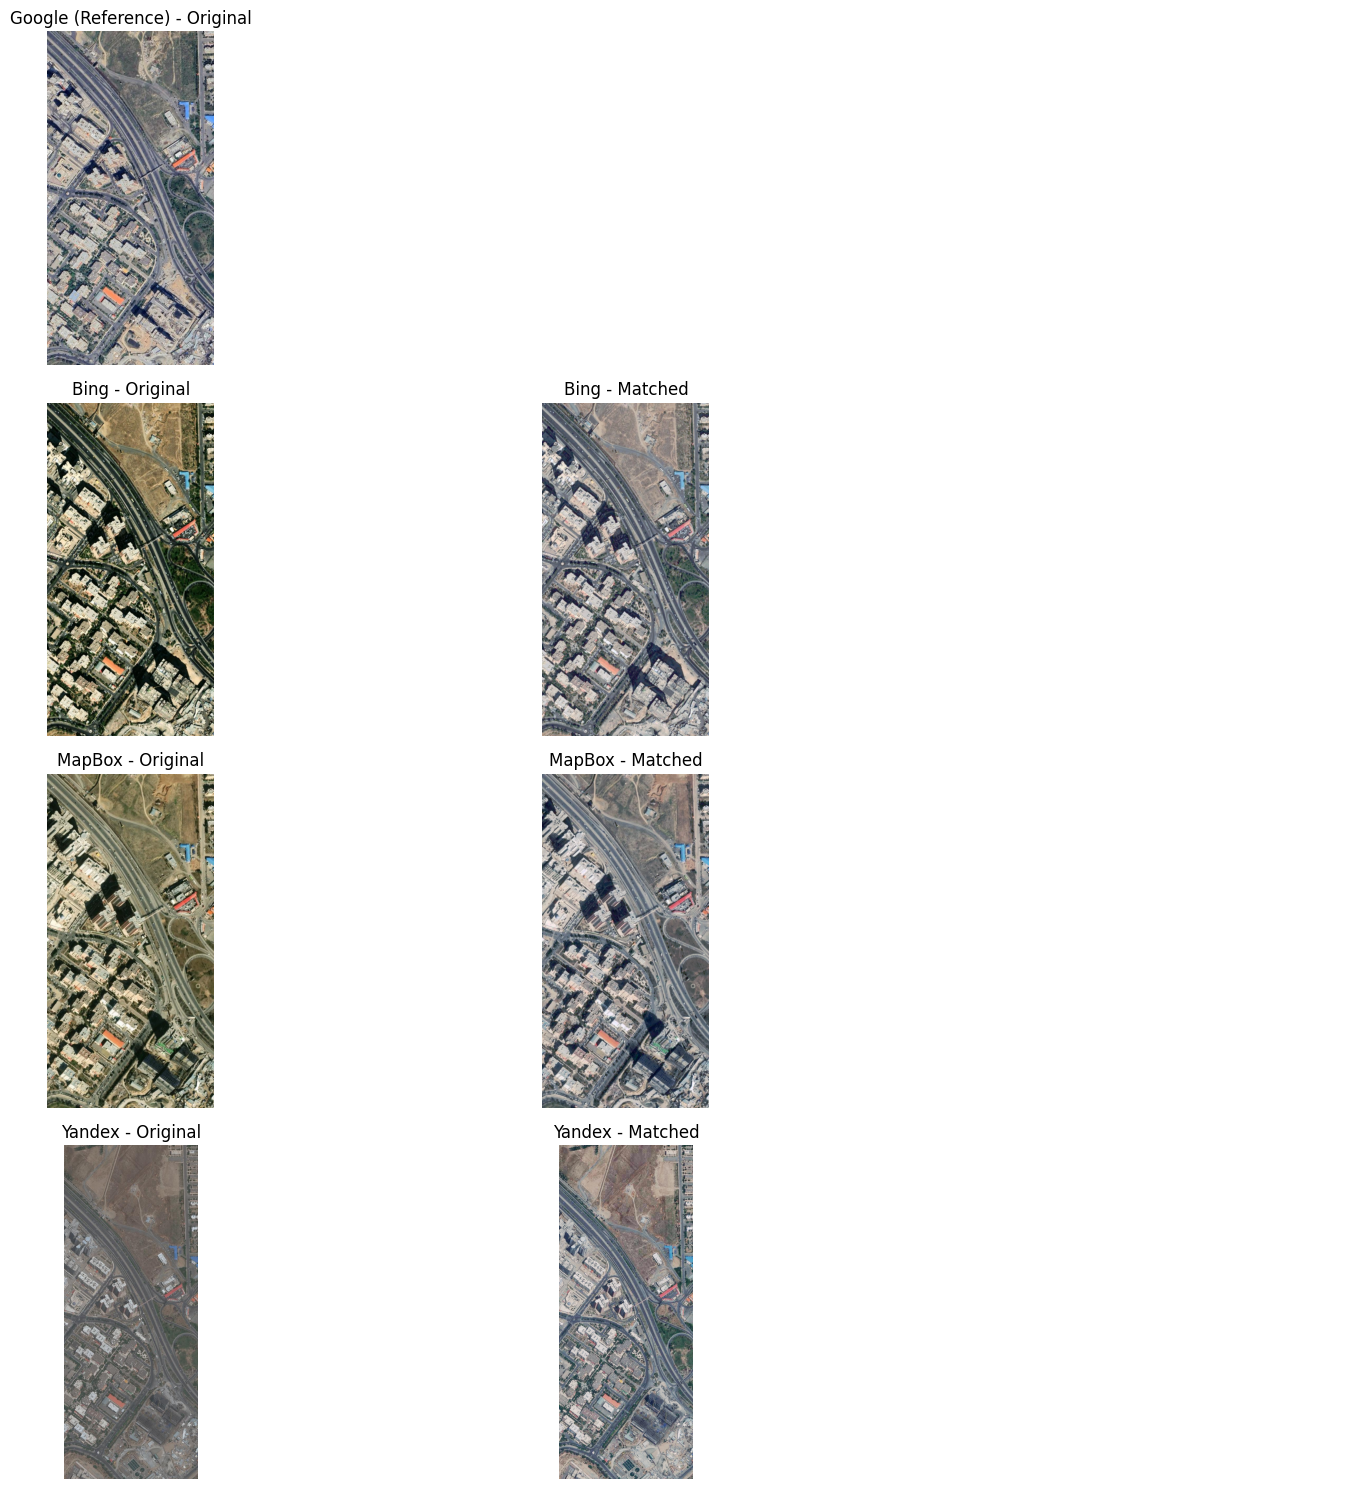


Processing Tile Set: (23)


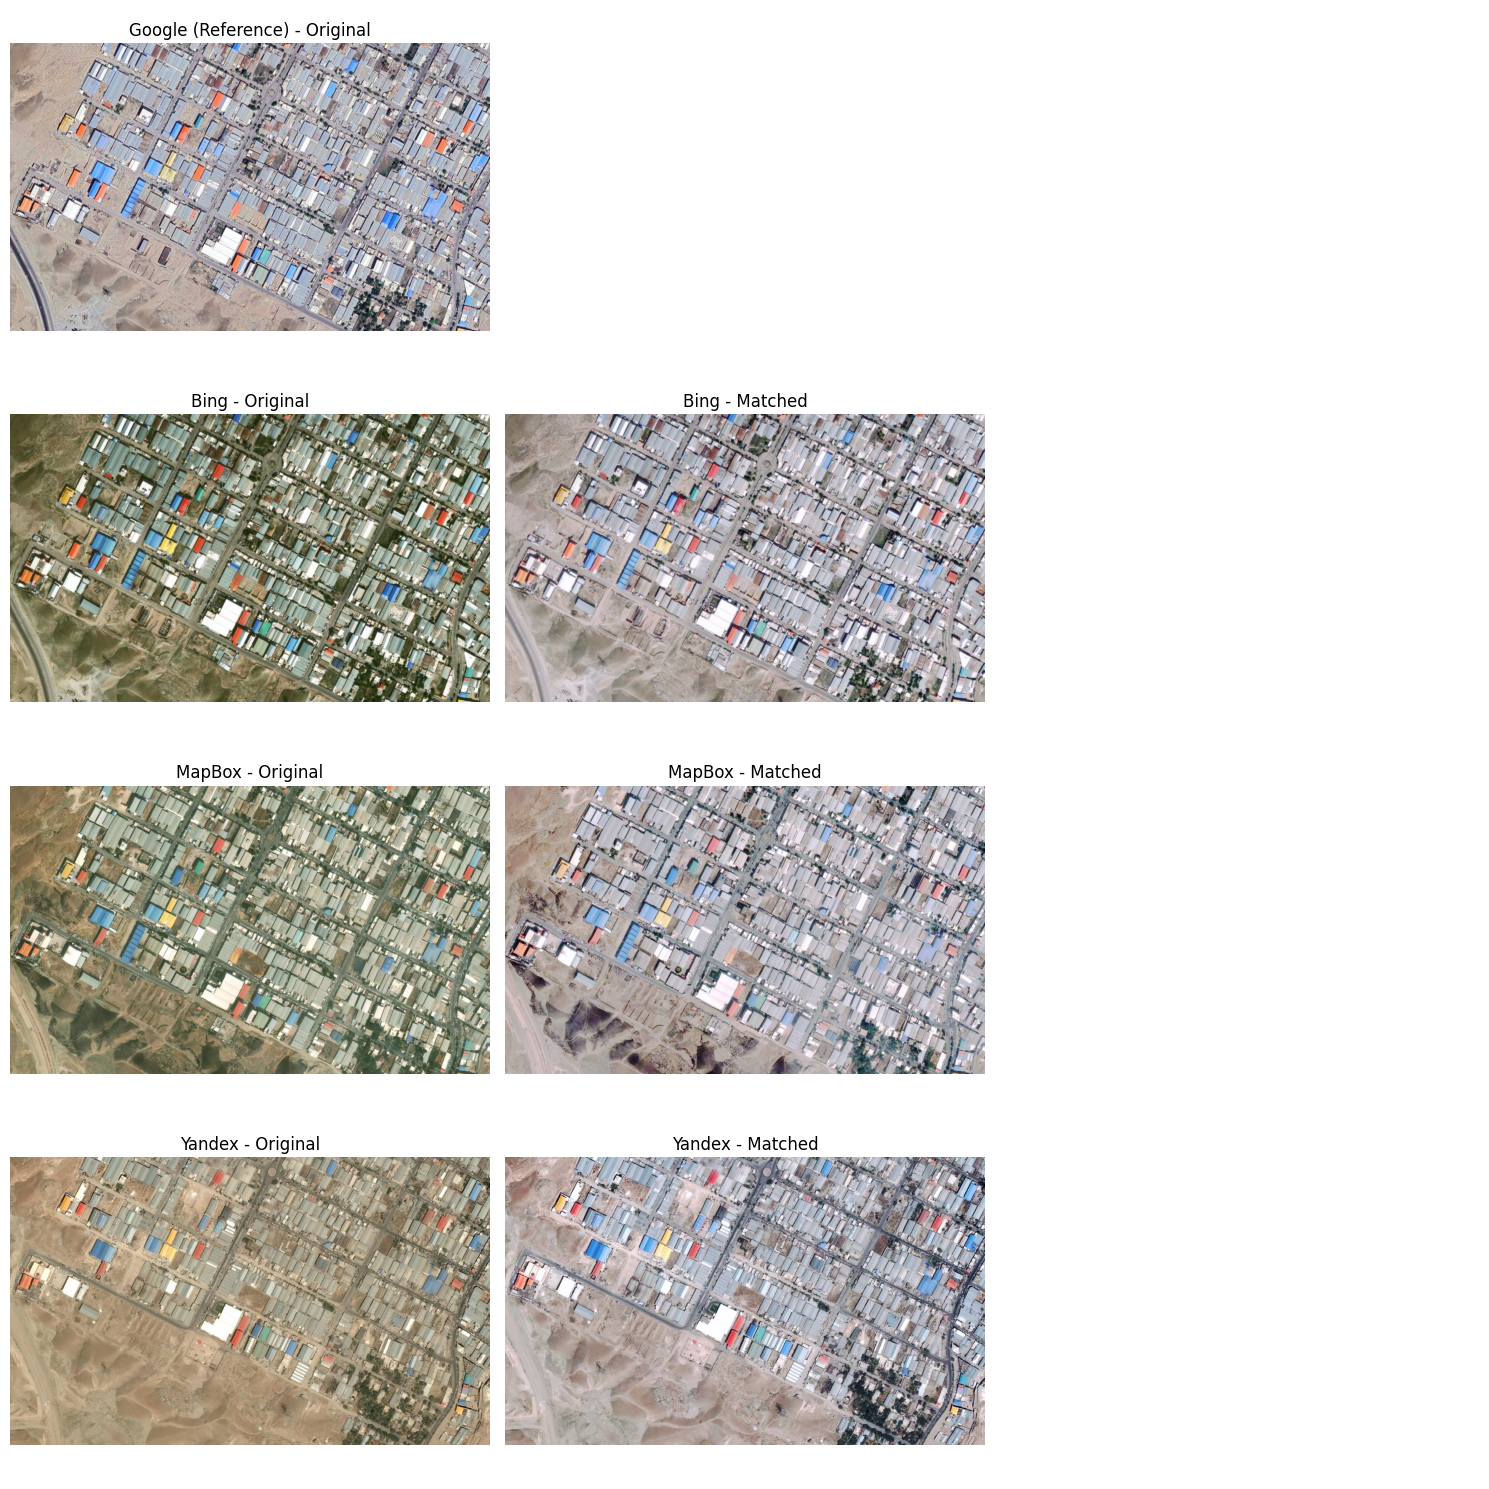


Processing Tile Set: (29)


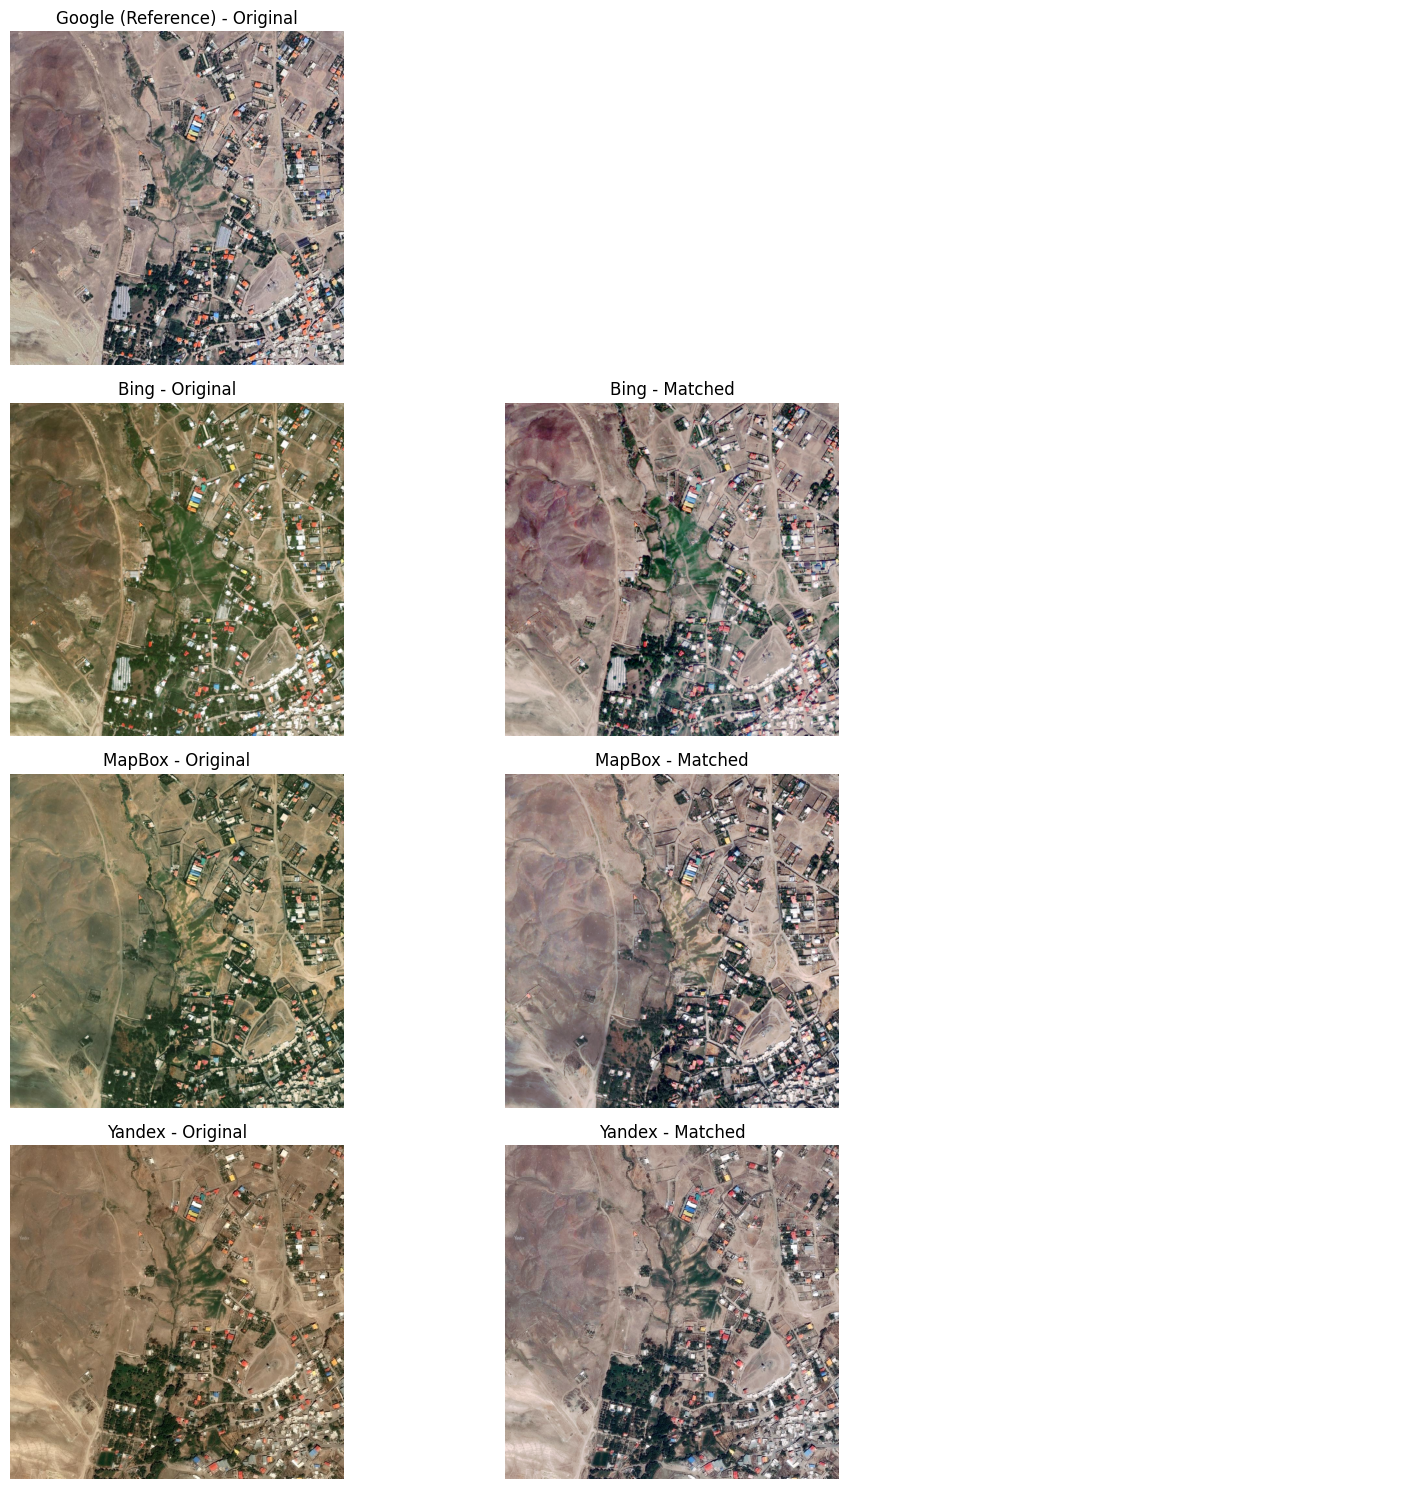

In [15]:
for set_idx, (ref_path, target_paths) in enumerate(zip(reference_sources, target_sets)):
    print(f"\nProcessing Tile Set: {['(0)', '(23)', '(29)'][set_idx]}")

    # Load reference image
    ref_img_bgr = cv2.imread(str(ref_path))
    ref_img = cv2.cvtColor(ref_img_bgr, cv2.COLOR_BGR2RGB)

    # Set up plot
    fig, axs = plt.subplots(4, 3, figsize=(15, 15))
    source_names = ["Google (Reference)", "Bing", "MapBox", "Yandex"]
    axs[0, 0].imshow(ref_img)
    axs[0, 0].set_title(f"{source_names[0]} - Original")
    axs[0, 1].axis('off')
    axs[0, 2].axis('off')

    # Process each target image
    for i, target_path in enumerate(target_paths):
        target_img_bgr = cv2.imread(str(target_path))
        target_img = cv2.cvtColor(target_img_bgr, cv2.COLOR_BGR2RGB)

        # Histogram Matching
        matched_img = match_histograms(target_img, ref_img, channel_axis=-1)

        # Plot original, reference, and matched
        axs[i+1, 0].imshow(target_img)
        axs[i+1, 0].set_title(f"{source_names[i+1]} - Original")
        # axs[i+1, 1].imshow(ref_img)
        # axs[i+1, 1].set_title("Reference (Google)")
        axs[i+1, 1].imshow(matched_img.astype(np.uint8))
        axs[i+1, 1].set_title(f"{source_names[i+1]} - Matched")

    for ax in axs.flatten():
        ax.axis('off')

    plt.tight_layout()
    plt.show()
